In [45]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sym

In [46]:
def FisherInfo(prob_function, phase_array):
    a = sym.Symbol('a')
    FI_array = []
    diff = sym.diff(prob_function, a)
    for i in range (len(phase_array)):
        FI = (diff**2)/(prob_function)
        FI_array.append(FI.subs(a,phase_array[i]))
    return FI_array

In [58]:
a = sym.Symbol('a')
prob_10 = sym.sin(a/2)**2
prob_01 = sym.cos(a/2)**2
prob_02 = 0.5*sym.sin(a)**2
prob_20 = 0.5*sym.sin(a)**2
prob_11 = sym.cos(a)**2

In [48]:
p10_array = []
p01_array = []
p02_array = []
p20_array = []
p11_array = []


In [49]:
phase = np.linspace(0,3*np.pi,100)

In [51]:
for i in range(len(phase)):
    p10_array.append(prob_10.subs(a, phase[i]))
    p01_array.append(prob_01.subs(a, phase[i]))
    p02_array.append(prob_02.subs(a, phase[i]))
    p20_array.append(prob_20.subs(a, phase[i]))
    p11_array.append(prob_11.subs(a, phase[i]))

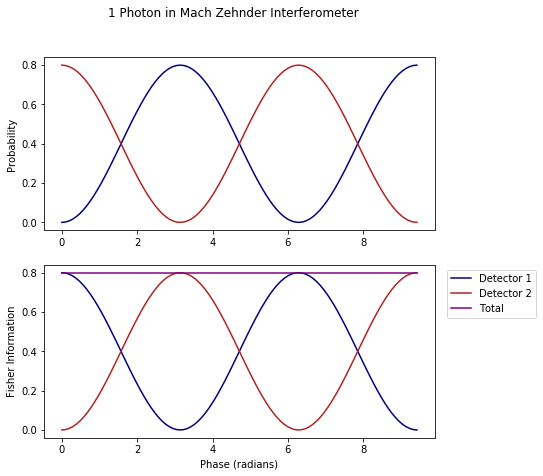

In [54]:
fig, ax = plt.subplots(2, figsize=(7,7))
fig.suptitle('1 Photon in Mach Zehnder Interferometer')

C = ['navy','firebrick','darkorange','gold','springgreen','magenta']

ax[0].set(ylabel='Probability')
ax[0].plot(phase, p10_array, label="Detector 1", color=C[0])
ax[0].plot(phase, p01_array, label = "Detector 2", color=C[1])

ax[1].set(xlabel='Phase (radians)', ylabel='Fisher Information')
ax[1].plot(phase, FisherInfo(prob_10, phase), label="Detector 1", color=C[0])
ax[1].plot(phase, FisherInfo(prob_01, phase), label = "Detector 2", color=C[1])
ax[1].plot(phase, np.sum([FisherInfo(prob_01, phase), FisherInfo(prob_10, phase)], axis=0), label = "Total", color='purple')
ax[1].legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.show()

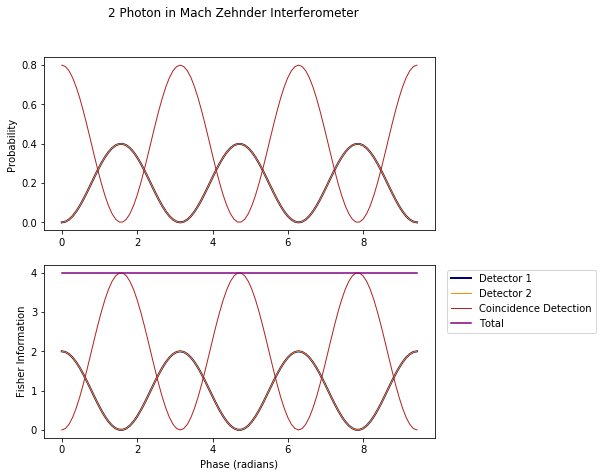

In [62]:
fig, ax = plt.subplots(2, figsize=(7,7))
fig.suptitle('2 Photon in Mach Zehnder Interferometer')

C = ['navy','firebrick','darkorange','gold','springgreen','magenta']

ax[0].set(ylabel='Probability')
ax[0].plot(phase, p02_array, label="Detector 1", color=C[0], linewidth=2)
ax[0].plot(phase, p20_array, label = "Detector 2", color=C[2], linewidth=1)
ax[0].plot(phase, p11_array, label = "Coincidence detection", color=C[1], linewidth=1)

ax[1].set(xlabel='Phase (radians)', ylabel='Fisher Information')
ax[1].plot(phase, FisherInfo(prob_20, phase), label="Detector 1", color=C[0], linewidth=2)
ax[1].plot(phase, FisherInfo(prob_02, phase), label = "Detector 2", color=C[2], linewidth=1)
ax[1].plot(phase, FisherInfo(prob_11, phase), label = "Coincidence Detection", color=C[1], linewidth=1)
ax[1].plot(phase, np.sum([FisherInfo(prob_20, phase), FisherInfo(prob_02, phase), FisherInfo(prob_11, phase)], axis=0), label = "Total", color='purple')
ax[1].legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.show()